In [1]:
!pip install -q tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Load dataset from Keras
# num_words=10000 keeps the top 10,000 most frequent words only
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

print("Training samples:", len(x_train))
print("Testing samples:", len(x_test))
print("Example review (word indices):", x_train[0])
print("Label (0=Negative, 1=Positive):", y_train[0])


17464789/17464789 [==============================] - 4s 0us/step
Training samples: 25000
Testing samples: 25000
Example review (word indices): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16

In [3]:
# Word index to decode reviews
word_index = keras.datasets.imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}  # shift for reserved indices
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode review
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(x_train[0]))


1641221/1641221 [==============================] - 0s 0us/step
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole fi

In [4]:
# Pad sequences to make all reviews the same length
x_train = keras.preprocessing.sequence.pad_sequences(x_train, value=0, padding='post', maxlen=256)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, value=0, padding='post', maxlen=256)

print("Padded shape:", x_train.shape)


Padded shape: (25000, 256)


In [5]:
# DNN model with Embedding + Global Average Pooling + Dense layers
model = keras.Sequential([
    layers.Embedding(input_dim=10000, output_dim=16, input_length=256),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160289 (626.13 KB)
Trainable params: 160289 (626.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Set aside some validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=1
)


Epoch 1/20


30/30 [==============================] - 4s 47ms/step - loss: 0.6925 - accuracy: 0.5133 - val_loss: 0.6915 - val_accuracy: 0.4959
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6887 - accuracy: 0.5728 - val_loss: 0.6856 - val_accuracy: 0.6898
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.6780 - accuracy: 0.7353 - val_loss: 0.6710 - val_accuracy: 0.7301
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6569 - accuracy: 0.7633 - val_loss: 0.6461 - val_accuracy: 0.7554
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6244 - accuracy: 0.7868 - val_loss: 0.6115 - val_accuracy: 0.7801
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5819 - accuracy: 0.8033 - val_loss: 0.5695 - val_accuracy: 0.7969
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5345 - accuracy: 0.8253 - val_loss: 0.5258 - val_accuracy: 0.8128
Epoch 8/20


In [7]:
results = model.evaluate(x_test, y_test)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])


782/782 [==============================] - 3s 3ms/step - loss: 0.3119 - accuracy: 0.8719
Test Loss: 0.31188586354255676
Test Accuracy: 0.8719199895858765


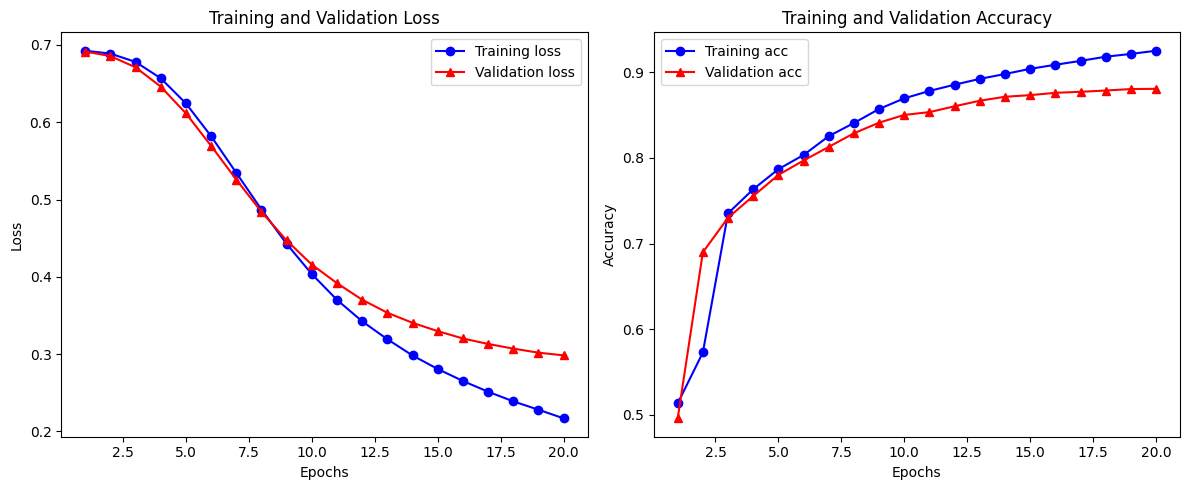

In [8]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'r^-', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
# Predict sentiment
sample_review = x_test[0].reshape(1, 256)
pred = model.predict(sample_review)[0][0]
print("Predicted Sentiment Score:", pred)
print("Predicted Label:", "Positive" if pred >= 0.5 else "Negative")


1/1 [==============================] - 0s 181ms/step
Predicted Sentiment Score: 0.20504218
Predicted Label: Negative
